In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
base_dir = r"C:\\Users\\nisha\\Downloads\\intel image"
train_dir = f"{base_dir}\\seg_train"
test_dir = f"{base_dir}\\seg_test"
 

In [7]:
# Set parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32


In [9]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


In [10]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3793 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(6, activation='softmax')  # 6 classes in Intel dataset
])

In [11]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Output classes match the dataset
])

c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    verbose=1
)

Epoch 1/20


c:\Users\nisha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 94s 747ms/step - accuracy: 0.3875 - loss: 1.4989 - val_accuracy: 0.5507 - val_loss: 1.0771
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - accuracy: 0.5640 - loss: 1.1283 - val_accuracy: 0.6330 - val_loss: 0.9741
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 241ms/step - accuracy: 0.6186 - loss: 1.0478 - val_accuracy: 0.6413 - val_loss: 0.9588
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - accuracy: 0.6428 - loss: 0.9785 - val_accuracy: 0.6610 - val_loss: 0.8994
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 232ms/step - accuracy: 0.6448 - loss: 0.9432 - val_accuracy: 0.6960 - val_loss: 0.8265
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 234ms/step - accuracy: 0.6780 - loss: 0.8829 - val_accuracy: 0.7040 - val_loss: 0.7953
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 230ms/step - accuracy: 0.6893 - loss: 0.8549 - val_accuracy: 0.7263 - val_loss: 0.7350
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 231ms/step - accuracy: 0.6768 - loss: 0.8544 - val

In [15]:
loss, accuracy = model.evaluate(test_data, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7685 - loss: 0.6499
Test Accuracy: 77.03%


In [19]:
from tensorflow.keras.layers import BatchNormalization

# Build the model
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer matches class count
])

In [20]:
# Compile the model
model1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,603,398 (13.75 MB)

 Trainable params: 3,602,438 (13.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [22]:
history1 = model1.fit(
    train_data,
    validation_data=test_data,
    epochs=20,  # You can increase or decrease epochs for tuning
    verbose=1
)



Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 46s 370ms/step - accuracy: 0.3557 - loss: 3.0501 - val_accuracy: 0.2657 - val_loss: 1.7838
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 46s 373ms/step - accuracy: 0.4578 - loss: 1.4432 - val_accuracy: 0.5070 - val_loss: 1.2424
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 365ms/step - accuracy: 0.4697 - loss: 1.3955 - val_accuracy: 0.4203 - val_loss: 1.9508
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 46s 378ms/step - accuracy: 0.4628 - loss: 1.3955 - val_accuracy: 0.4763 - val_loss: 1.3308
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 622s 5s/step - accuracy: 0.4683 - loss: 1.4066 - val_accuracy: 0.2750 - val_loss: 1.7422
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 365ms/step - accuracy: 0.4439 - loss: 1.4316 - val_accuracy: 0.4733 - val_loss: 1.4093
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 372ms/step - accuracy: 0.4739 - loss: 1.3851 - val_accuracy: 0.4663 - val_loss: 1.2682
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 365ms/step - accuracy: 0.4524 - loss: 1.4

In [23]:


# Evaluate the model on the test dataset
loss1, accuracy1 = model1.evaluate(test_data, verbose=1)
print(f"Test Loss: {loss1:.4f}")
print(f"Test Accuracy: {accuracy1 * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.4678 - loss: 1.4444
Test Loss: 1.4478
Test Accuracy: 47.23%


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 for transfer learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze base model layers
base_model.trainable = False

# Build the new model
model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(train_data.class_indices), activation='softmax')
])

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a suitable learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model2.summary()



C:\Users\nisha\AppData\Local\Temp\ipykernel_6948\1903141800.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
# Train the model
history2 = model2.fit(
    train_data,
    validation_data=test_data,
    epochs=20,  # You can tune this further
    verbose=1
)

# Evaluate the model
loss2, accuracy2 = model2.evaluate(test_data, verbose=1)
print(f"Test Loss: {loss2:.4f}")
print(f"Test Accuracy: {accuracy2 * 100:.2f}%")

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 237ms/step - accuracy: 0.6505 - loss: 1.0001 - val_accuracy: 0.8537 - val_loss: 0.3979
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 232ms/step - accuracy: 0.8280 - loss: 0.4977 - val_accuracy: 0.8817 - val_loss: 0.3228
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 232ms/step - accuracy: 0.8484 - loss: 0.4390 - val_accuracy: 0.8847 - val_loss: 0.3151
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 230ms/step - accuracy: 0.8481 - loss: 0.4172 - val_accuracy: 0.8900 - val_loss: 0.2984
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.8526 - loss: 0.3825 - val_accuracy: 0.8853 - val_loss: 0.3159
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.8474 - loss: 0.4072 - val_accuracy: 0.8780 - val_loss: 0.3235
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.8638 - loss: 0.3670 - val_accuracy: 0.8803 - val_loss: 0.3326
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8786 - loss: 0.3

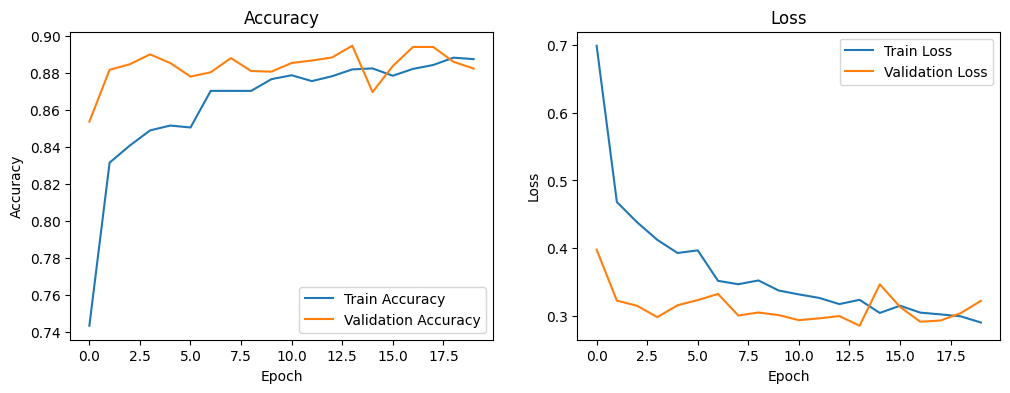

In [26]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()